In [1]:
from mongoengine import connect
from uatube.models import Channel, Subscription

In [2]:
connect(db='uatube', host='localhost', port=51999)

MongoClient(host=['localhost:51999'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary(), uuidrepresentation=3)

In [25]:
cursor = Channel.objects(has_opened_subscriptions=True)

In [26]:
channels = list(cursor)

In [28]:
source_channel = {}

for channel in channels:
    for source in channel.found_from_channel:
        if source not in source_channel:
            source_channel.setdefault(source, 1)
        else:
            source_channel[source] = source_channel[source] + 1

source_channel

{'UC-HNFt8XqtMXgkBlZB83v3A': 34,
 'UCL0tSwuCfEQi6EFSUJd83VQ': 156,
 'UCNfxB3nWgDIpkItC6KSqKsw': 162,
 'UCZuW4AUy-HuCUUMTLajX4Uw': 25,
 'UCxp1-LnjacWPhInrSE96ikg': 12,
 'UCfNrBzcNw_7ymcDi1CK_C8w': 78,
 'UCy3biyiu0UWvWjoFTvMcbbw': 13,
 'UCb6fUN4-UvIRtYmwtR-PeOg': 24,
 'UCg7T647ROSeONOCHeNMBduQ': 47,
 'UCWRZ7gEgbry5FI2-46EX3jA': 49,
 'UC_FR3B7aW2Ke2acWi54PWTA': 15,
 'UCsWMSE0bHdHLCqsMXUfQeSA': 10,
 'UCZtTmVSdLps7HoiJNGy2N5Q': 31,
 'UCS69bcGLxF0OuwXbnspVhPQ': 8,
 'UCig7t6LFOjS2fKkhjbVLpjw': 48,
 'UCHZIF31Cnb89AzcFt7Xu9dg': 42,
 'UCTY4zQ2wDTZk91XeKXWUk7Q': 27,
 'UC1Q2MLy0DEswY-1ZheTcYig': 44,
 'UCsSYbcw93UcytV39VTmvQWg': 50}

In [30]:
import json

with open("sample_20_with_props.json", 'r', encoding='utf-8') as f:
    manifest_20 = json.load(f)

manifest_20

[{'channel_id': 'UC-HNFt8XqtMXgkBlZB83v3A',
  'channel_name': 'Yanina Sokolova',
  'channel_url': 'https://www.youtube.com/channel/UC-HNFt8XqtMXgkBlZB83v3A',
  'proportion': 0.040487783480282494,
  'num_users': 243},
 {'channel_id': 'UCZuW4AUy-HuCUUMTLajX4Uw',
  'channel_name': 'Mary. lvk',
  'channel_url': 'https://www.youtube.com/channel/UCZuW4AUy-HuCUUMTLajX4Uw',
  'proportion': 0.024345308593235953,
  'num_users': 146},
 {'channel_id': 'UCxp1-LnjacWPhInrSE96ikg',
  'channel_name': 'Liolik Ua',
  'channel_url': 'https://www.youtube.com/channel/UCxp1-LnjacWPhInrSE96ikg',
  'proportion': 0.025924463745229637,
  'num_users': 156},
 {'channel_id': 'UCfNrBzcNw_7ymcDi1CK_C8w',
  'channel_name': 'Aleksey Durnev',
  'channel_url': 'https://www.youtube.com/channel/UCfNrBzcNw_7ymcDi1CK_C8w',
  'proportion': 0.06053428082642453,
  'num_users': 363},
 {'channel_id': 'UCy3biyiu0UWvWjoFTvMcbbw',
  'channel_name': 'НАС.Інфо',
  'channel_url': 'https://www.youtube.com/channel/UCy3biyiu0UWvWjoFTvMcb

In [34]:
source_channel_name = {c['channel_name']:source_channel[c['channel_id']]for c in manifest_20 if c['channel_id'] in source_channel}

In [39]:
total = sum(source_channel_name.values())

In [40]:
source_channel_props = {k:{"count": v, "prop": v/total} for k, v in source_channel_name.items()}

In [41]:
source_channel_props

{'Yanina Sokolova': {'count': 34, 'prop': 0.038857142857142854},
 'Mary. lvk': {'count': 25, 'prop': 0.02857142857142857},
 'Liolik Ua': {'count': 12, 'prop': 0.013714285714285714},
 'Aleksey Durnev': {'count': 78, 'prop': 0.08914285714285715},
 'НАС.Інфо': {'count': 13, 'prop': 0.014857142857142857},
 'Корупція.Інфо': {'count': 24, 'prop': 0.027428571428571427},
 'Бутусов Плюс': {'count': 47, 'prop': 0.053714285714285714},
 'Телеканал ATR': {'count': 15, 'prop': 0.017142857142857144},
 'Народна Думка': {'count': 10, 'prop': 0.011428571428571429},
 'DZIDZIO': {'count': 31, 'prop': 0.03542857142857143},
 'MED MUSIC': {'count': 8, 'prop': 0.009142857142857144},
 'Andro-news.com': {'count': 156, 'prop': 0.1782857142857143},
 'Food Around The World': {'count': 42, 'prop': 0.048},
 'Football Hub': {'count': 27, 'prop': 0.030857142857142857},
 'імені Т.Г. Шевченка': {'count': 44, 'prop': 0.05028571428571429},
 'Загін Кіноманів': {'count': 48, 'prop': 0.054857142857142854},
 'Пешка': {'count'

In [44]:
total_channels_pipeline = [
  {
    "$group":
      {
        "_id": "$subscriber_id",
        "total_channels": {
          "$sum": 1,
        },
      },
  },
  {
    "$sort":
      {
        "total_channels": -1,
      },
  },
]

cursor = Subscription.objects().aggregate(total_channels_pipeline)

total_channels_per_subscriber = list(cursor)

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
dataset = pd.DataFrame.from_dict(total_channels_per_subscriber)

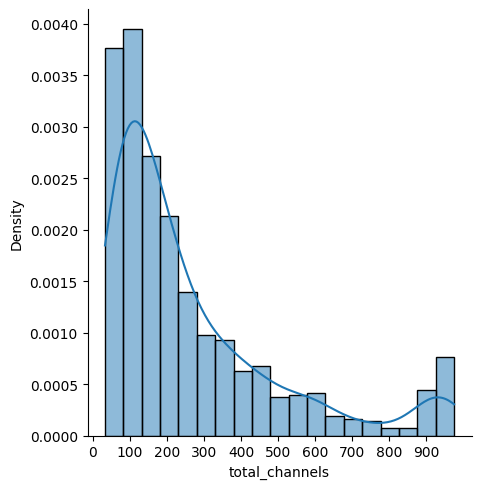

In [66]:
sns.displot(data=dataset, x="total_channels", kde=True, stat='density')
plt.gca().set_xticks(range(0, max(dataset['total_channels']), 100))  # Set x-axis ticks every 10 points

# Show plot
plt.show()

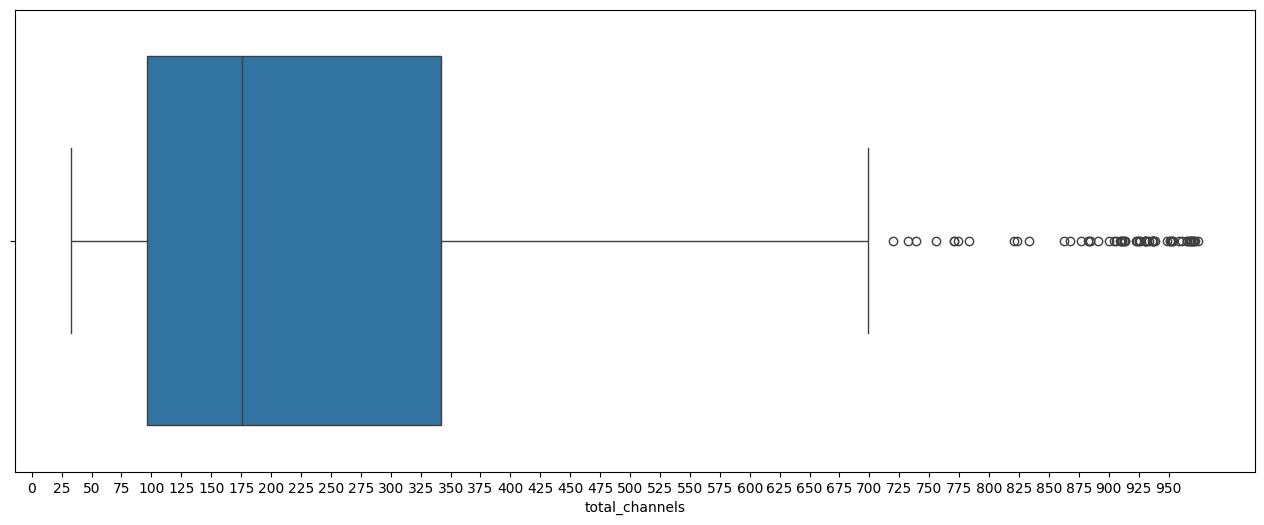

In [64]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=dataset, x="total_channels")

plt.gca().set_xticks(range(0, max(dataset['total_channels']), 25))  # Set x-axis ticks every 10 points

# Show plot
plt.show()

In [71]:
subs_pipeline = [
    {
        '$group': {
            '_id': '$channel_id', 
            'count': {
                '$count': {}
            }, 
            'channel_title': {
                '$first': '$channel_title'
            }
        }
    }, {
        '$sort': {
            'count': -1
        }
    }
]

cursor = Subscription.objects().aggregate(subs_pipeline)

subs = list(cursor)

In [74]:
subs_df = pd.DataFrame.from_dict(subs)

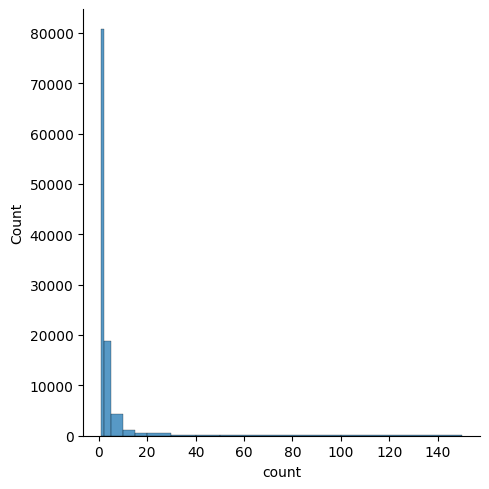

In [86]:
sns.displot(data=subs_df, x="count", kde=False, bins=[1,2,5,10,15,20,30,40,50,100,150])